## **Робота згорткової нейронної мережі (CNN) у Tensorflow**

Відомо три найважливіші частини для побудови згорткової нейронної мережі:

1.   Convolution (Згортка)
2.   Pooling (Об'єднання)
3.   Flattening (Перетворення на одновимірний масив)

Ці три частини є тими дуже особливими речами, які роблять згорточні нейронні мережі набагато кращими порівняно з іншими штучними нейронними мережами. Тепер обговоримо їх докладніше,

Convolution (Згортка)
Зображення розміром 28*28, як-от набір даних MINST, який в основному є розпізнаванням рукописних цифр, зручні для побудови простих моделей розпізнавання.

Наприклад, щоб побудувати модель для розпізнавання цифр за допомогою простої штучної нейронної мережі, ми подамо значення кожного пікселя окремо як вхідну функцію всередині моделі, а це 784 вхідні вузли, і у вас буде пара прихованих шарів. Модель може працювати добре, але проблема в тому, що вона не зможе розпізнати важливі елементи зображення. Вона сліпо зчитує пікселі та розділить вихід.  

Розглянемо зображення розміром 1920 на 1080 Ultra HD. Якщо ми будемо дотримуватися того самого методу, практично буде 2 мільйони вхідних вузлів, і навіть якщо ми візьмемо прихований шар із 64 вузлів, чого зовсім недостатньо для такого великого обсягу даних, у нас буде 130 мільйонів ваг, і буде шалена кількість обчислень, тому компёютеру буде вкрай складно керувати такою кількістю обчислень за раз.

Отже, для обробки і розпізнавання зображень спочатку потрібно знайти важливі характеристики зображення.

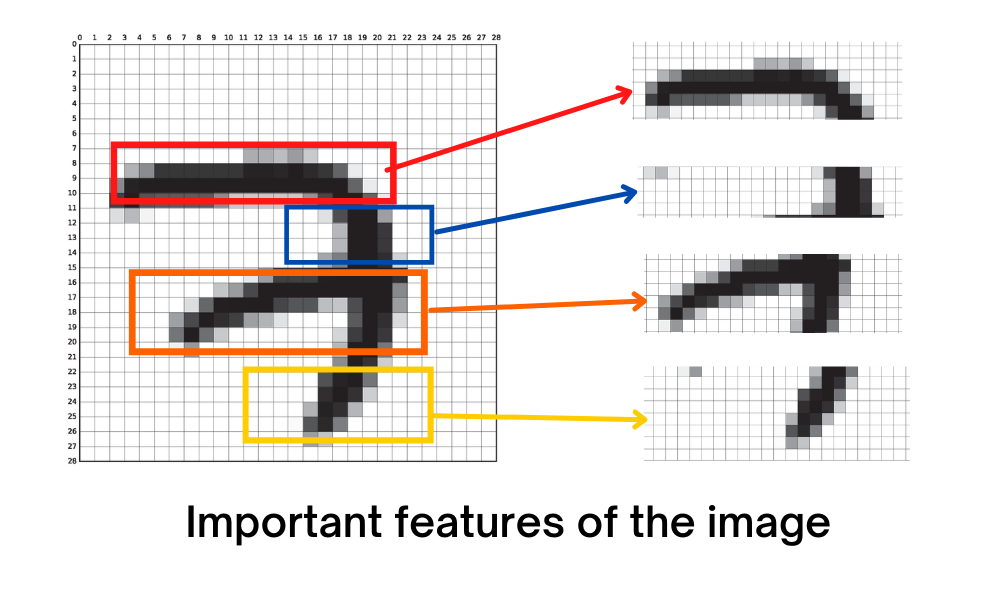

## Convolution (вбудований фільтр)

Знайшовши ці важливі функції, ми можемо залишити небажані пікселі без шкоди для якості результату. За допомогою цього методу ми можемо надати моделі людський рівень розпізнавання зображення в реальному світі. Отже, для цього ми маємо згортку.

Згортка є найбільш заплутаною та найскладнішою темою в Інтернеті, але це просто пошук зображення шляхом ковзання фільтра (ядра) по зображенню, щоб знайти різні функції зображення. Ядра — це просто двовимірні матриці з різними вагами в них. По суті, це ядро ​​передаватиме зображення, замінюючи значення пікселів середнім значенням суми його ваги у відповідній частині зображення. Ці ядра — чудовий спосіб знайти найважливіші функції зображення.

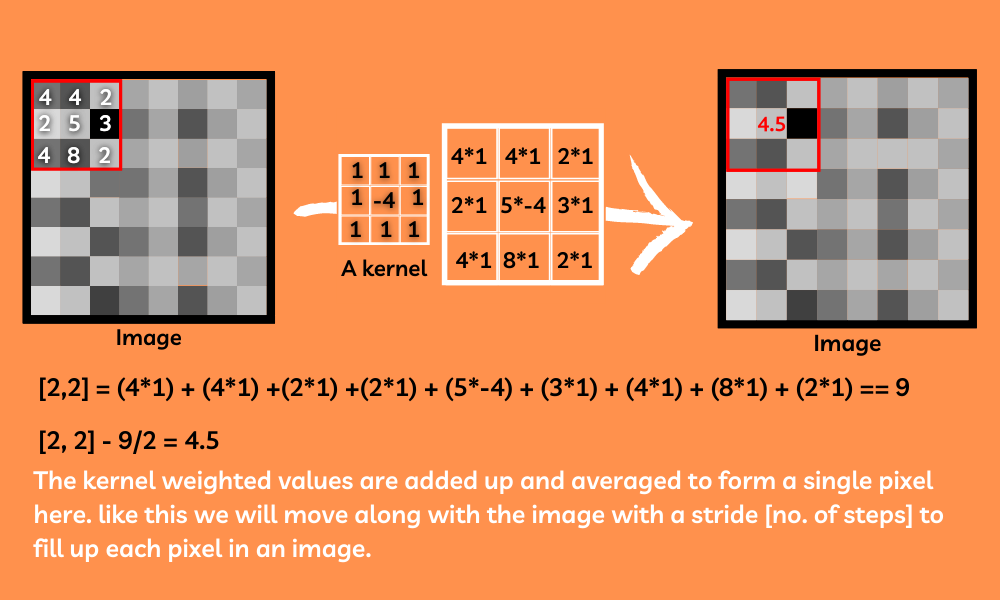

Ми застосуємо кілька випадково згенерованих ядер до зображення, щоб знайти багато різних функцій зображень  

Тож після застосування цього шару згортки до нашої моделі нам потрібно об’єднати функції.







## Pooling (Об'єднання)

Тепер, коли ви знайшли важливі особливості зображення, кількість введених даних є дуже великою, і наша машина не зможе впоратися з такою кількістю введених даних. Отже, ось де з’являється об’єднання.  

Об’єднання — це просто зменшення розміру зображення без втрати функцій, які ми знайшли за допомогою згортки. Наприклад, метод MaxPooling матиме форму матриці та повертатиме більше значення в цьому діапазоні. Роблячи це, ми можемо стиснути зображення, не втрачаючи важливих функцій цього зображення.


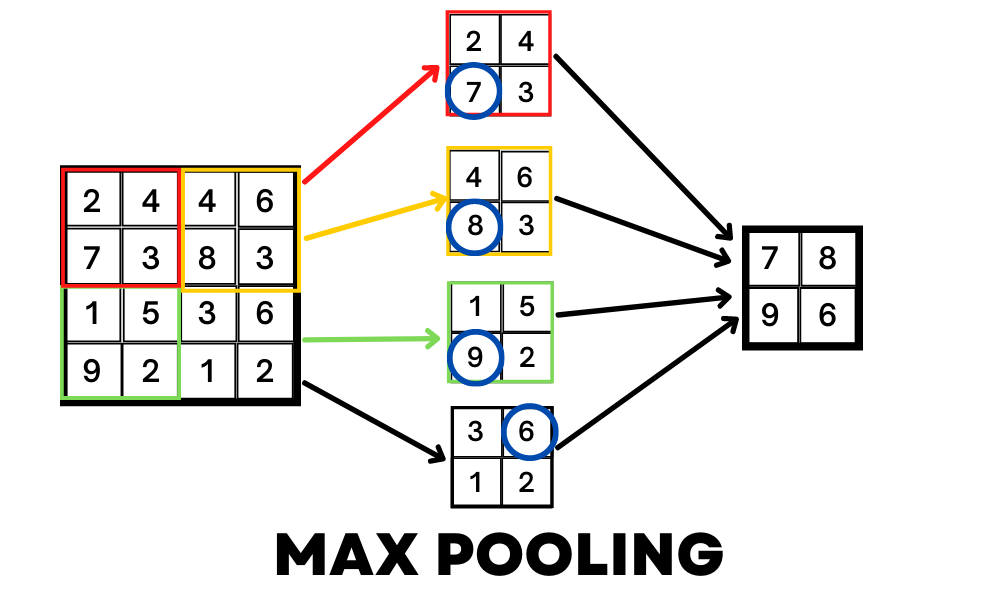

##Flatten(перетворення на одновимірний масив)

Зведення — це не що інше, як перетворення 3D- або 2D-матриці на 1D-вхід для моделі. Це буде наш останній крок для обробки зображення та підключення входів до повністю пов’язаного щільного шару для подальшої класифікації.





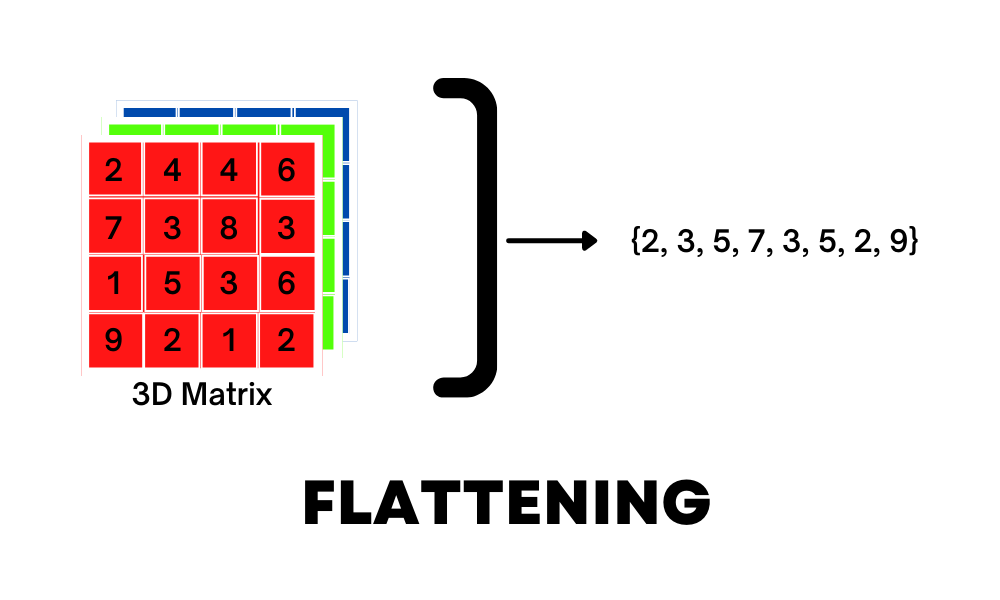

## Принцип роботи згорткової нейронної мережи


Підсумовуючи, принцип роботи згорткової нейронної мережі такий:

1. Застосування згортки для пошуку різних важливих функцій усередині зображення   

   syntax: model.add(layers.Conv2D(no. of kernels, size of the kernel, activation=’relu’, input_shape)

2. Застосування pooling (об’єднання) для стиснення зображення без втрати його функцій   

   syntax:  model.add(layers.MaxPooling2D((size of the kernel)))

3. Зведення (flatten) його до одновимірного входу з 3D [кольорових зображень] або 2D [чорно-білих зображень] для передачі в модель   

   syntax: model.add(layers.Flatten()

4. Повністю пов’язані вхідні та приховані шари для операцій з вагами та упередженнями, функціями активації та оптимізаторами.


## **Приклад конволюційної нейронної мережи для розпізнавання зображень цифр:**

Завантажимо набор зображень рукописних цифр MNIST.


In [14]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

# Plotting random images from dataset

# import matplotlib.pyplot as plt
# import random
# plt.figure(figsize = (12,5))
# for i in range(8):
# ind = random.randint(0, len(X_train))
# plt.subplot(240+1+i)
# plt.imshow(X_train[ind], cmap=True)


X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


Виконаємо попередньу обробку зображень: приведення елементів масиву, які відповідають кожному пікселу зображення, до формату float32 та перекодування елементів масиву з діапазону 0-255 к діапазону 0-1.

Мітки зображень перетворюємо в категоріальний вигляд.

In [15]:
from tensorflow.keras.utils import to_categorical

# convert image datatype from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalising piel values
X_train = X_train/255.0
X_test = X_test/255.0

# reshape images to add channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# One-hot encoding label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Створюємо модель з двома конволюційними шарами (модель типу LeNet-5, загальна кількість шарів дорівнює 5)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

# Layer 1
# Conv 1
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation = 'relu', input_shape = (28,28,1)))
# Pooling 1
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# Layer 2
# Conv 2
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation='relu'))
# Pooling 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Layer 3
# Fully connected layer 1
model.add(Dense(units=120, activation='relu'))

#Layer 4
#Fully connected layer 2
model.add(Dense(units=84, activation='relu'))

#Layer 5
#Output Layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Друкуємо загальні відомості про модель:

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Виконуємо навчання моделі

In [18]:
epochs = 20
batch_size = 512
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
					steps_per_epoch=X_train.shape[0]//batch_size,
					validation_data=(X_test, y_test),
					validation_steps=X_test.shape[0]//batch_size, verbose = 1)

_, acc = model.evaluate(X_test, y_test, verbose = 1)
print('%.3f' % (acc * 100.0))


Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.6412 - loss: 1.2100 - val_accuracy: 0.9470 - val_loss: 0.1786
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2541 - val_accuracy: 0.8897 - val_loss: 0.3539
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.9476 - loss: 0.1725 - val_accuracy: 0.9685 - val_loss: 0.1033
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9479 - loss: 0.1880 - val_accuracy: 0.9338 - val_loss: 0.2109
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - accuracy: 0.9668 - loss: 0.1094 - val_accuracy: 0.9746 - val_loss: 0.0786
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9583 - loss: 0.1336 - val_accuracy: 0.9449 - val_loss: 0.1608
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - accuracy: 0.9732 - loss: 0.0845 - val_accuracy: 0.9781 - val_loss: 0.0657
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0785 - val

Ілюструємо хід навчання моделі

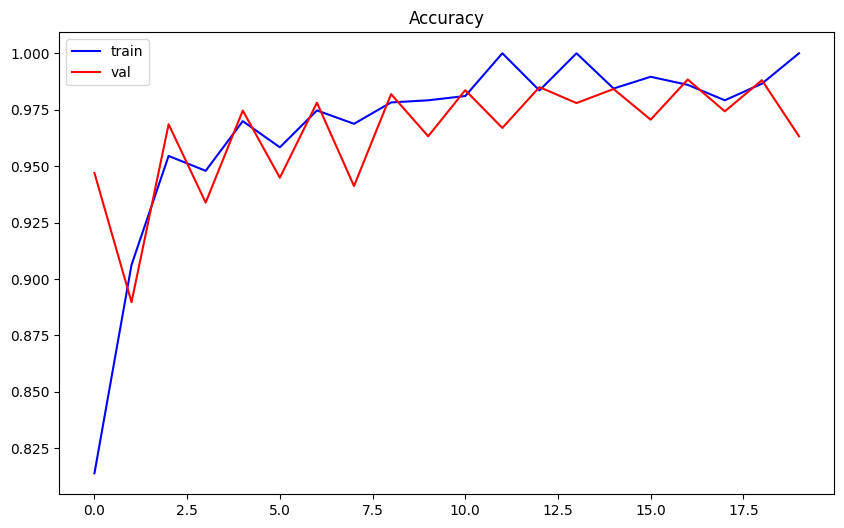

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
plt.legend()
plt.title('Accuracy')
plt.show()

## **Завдання**



1.   Перевірити, як впливаєна час і результати навчання моделі кількість епох навчання
2.  Дослідити, як змінить хід і результати навчання зміна кількості нейронів в щільних та конволюційних шарах.
3.   Доати один, а потім два конволюційні блоки, також дослідити якість навчання моделі.
4.   Побудувати аналогічний класифікатор для набору даних Fashion MNIST з попередньої роботи.

